In [91]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.stats import linregress

# Calibrating Frequency / Voltage

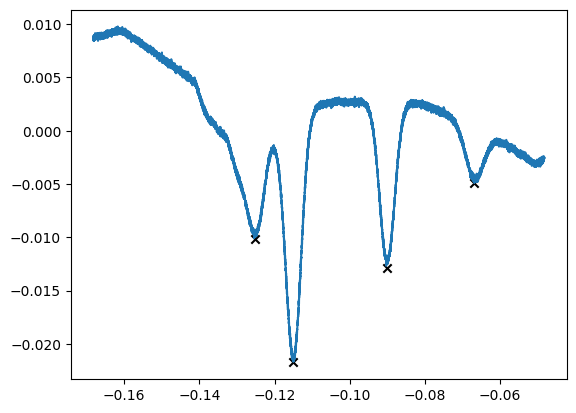

In [98]:
dataframe = read_csv("4_4_1-V2.CSV", names=["t","c1", "c2"])    
dataframe.drop(dataframe.index[[0]], inplace=True)
dataframe = dataframe.astype(float)

data = dataframe.values
t, c1, c2 = data[:, 0], data[:, 1], data[:, 2]

# Find peaks (needed to plot envelope)
peaks = find_peaks(-c2, height=0.004, distance=10000)[0]

xpeaks = np.array([t[i] for i in peaks])
ypeaks = np.array([c2[i] for i in peaks])

peakVoltages = np.array([c1[i] for i in peaks])

f0 = 0
f1 = f0 + 1.296117462789e9
f2 = f1 + 3.035732439e9 
f3 = f2 + 2.500832709015e9
peakFrequencies = np.array([f0,f1,f2,f3])

plt.scatter(xpeaks, ypeaks, marker='x', c='black')
plt.plot(t[::10], c2[::10])

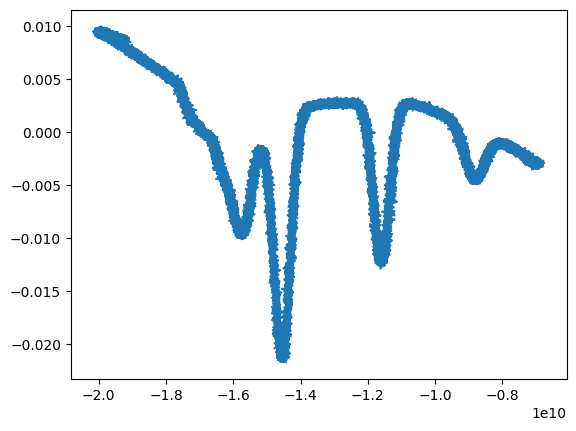

In [105]:
df_dv, _, _, _, _ = linregress(peakVoltages, peakFrequencies)

plt.plot(c1*df_dv, c2)